<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0622_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80%2C%ED%9A%8C%EA%B7%80_%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [4]:
data=cancer.data
label=cancer.target

In [5]:
df=pd.DataFrame(data,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss=StandardScaler()
scaled_data=ss.fit_transform(data)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [12]:
x_train,x_test, y_train,y_test = train_test_split(scaled_data,label)

In [13]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
acs = accuracy_score(y_test,pred)
ras = roc_auc_score(y_test,pred)
print(f"accuracy:{acs:.3f} roc_auc:{ras:.3f}")


accuracy:0.944 roc_auc:0.925


In [14]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']
for solver in solvers:
    lr = LogisticRegression(solver=solver,max_iter=600)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acs = accuracy_score(y_test,pred)
    ras = roc_auc_score(y_test,pred)
    print(f"{solver:10s} accuracy:{acs:.3f} roc_auc:{ras:.3f}")


lbfgs      accuracy:0.944 roc_auc:0.925
liblinear  accuracy:0.944 roc_auc:0.925
newton-cg  accuracy:0.944 roc_auc:0.925
sag        accuracy:0.944 roc_auc:0.925
saga       accuracy:0.944 roc_auc:0.925


In [15]:
params = {
    'solver':['liblinear','lbfgs'],
    'penalty':['l2','l1'],
    'C':[0.01,0.1,1,5,10]
}


In [20]:
lr = LogisticRegression()
gs = GridSearchCV(lr,param_grid=params,scoring='accuracy',cv=3)
gs.fit(x_train,y_train)
print(gs.best_params_)
print(gs.best_score_)


{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.9859154929577465


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [21]:
pred = gs.predict(x_test)
acs = accuracy_score(y_test,pred)
ras = roc_auc_score(y_test,pred)
print(f"accuracy:{acs:.3f} roc_auc:{ras:.3f}")


accuracy:0.951 roc_auc:0.935


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [24]:
model=RandomForestRegressor(n_estimators=1000)
nmse=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=5)


In [25]:
nmse

array([-0.03080645, -0.04133878, -0.0403032 , -0.02647996, -0.03123254])

In [29]:
print(np.sqrt(-1*nmse).mean())

0.18380952017712343


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [31]:
m1 = DecisionTreeRegressor(max_depth=4)
m2 = RandomForestRegressor(n_estimators=1000)
m3 = GradientBoostingRegressor(n_estimators=1000)
m4 = XGBRegressor(n_estimators=1000)
m5 = LGBMRegressor(n_estimators=1000)


In [39]:
models=[m1,m2,m3,m4,m5]
for model in models:
    print(model.__class__.__name__,"$$$$$$$$$$$$")
    nmse=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
    print('rmse평균:',np.sqrt(-1*nmse).mean())

DecisionTreeRegressor $$$$$$$$$$$$
rmse평균: 0.24488892003628449
RandomForestRegressor $$$$$$$$$$$$
rmse평균: 0.18232360007745116
GradientBoostingRegressor $$$$$$$$$$$$
rmse평균: 0.18896994489881186
XGBRegressor $$$$$$$$$$$$
rmse평균: 0.19468037454594628
LGBMRegressor $$$$$$$$$$$$
rmse평균: 0.1636237390441984


In [41]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(x_train,y_train)
model.feature_importances_


array([0.00156738, 0.02483935, 0.00144594, 0.00156475, 0.00165702,
       0.00182384, 0.01067208, 0.02560828, 0.00453289, 0.00133529,
       0.00288058, 0.00560595, 0.00202509, 0.01022737, 0.00388817,
       0.00282622, 0.00239357, 0.0020282 , 0.0019706 , 0.00301202,
       0.05762185, 0.02192792, 0.51411589, 0.1615216 , 0.01957961,
       0.00193724, 0.00620731, 0.10089993, 0.00277869, 0.00150534])

In [46]:
path='/content/drive/MyDrive/python_basic/data/boston_house.csv'
df=pd.read_csv(path)
data=df.drop('Target',axis=1)
label=df['Target']
ss=StandardScaler()
scaled_data=ss.fit_transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,label)

In [47]:
models=[m1,m2,m3,m4,m5]
for model in models:
    print(model.__class__.__name__,"$$$$$$$$$$$$")
    nmse=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
    print('rmse평균:',np.sqrt(-1*nmse).mean())

DecisionTreeRegressor $$$$$$$$$$$$
rmse평균: 4.827072672923448
RandomForestRegressor $$$$$$$$$$$$
rmse평균: 3.585442803167015
GradientBoostingRegressor $$$$$$$$$$$$
rmse평균: 3.294297991877445
XGBRegressor $$$$$$$$$$$$
rmse평균: 3.6466294270569124
LGBMRegressor $$$$$$$$$$$$
rmse평균: 3.783622549800099


In [48]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(x_train,y_train)
model.feature_importances_


array([0.0114662 , 0.01049319, 0.46502698, 0.05647766, 0.03960225,
       0.0065686 , 0.35771022, 0.01421973, 0.01747524, 0.00375057,
       0.00144637, 0.0146167 , 0.00114629])

In [49]:
sd = pd.Series(model.feature_importances_,index=data.columns)
sd = sd.sort_values(ascending=False)
sd

RM         0.465027
LSTAT      0.357710
CRIM       0.056478
DIS        0.039602
PTRATIO    0.017475
TAX        0.014617
NOX        0.014220
AGE        0.011466
B          0.010493
INDUS      0.006569
RAD        0.003751
ZN         0.001446
CHAS       0.001146
dtype: float64

In [52]:
import seaborn as sns

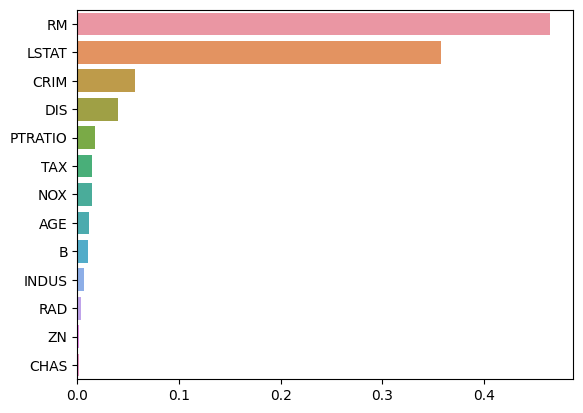

In [53]:
sns.barplot(x=sd,y=sd.index)
plt.show()

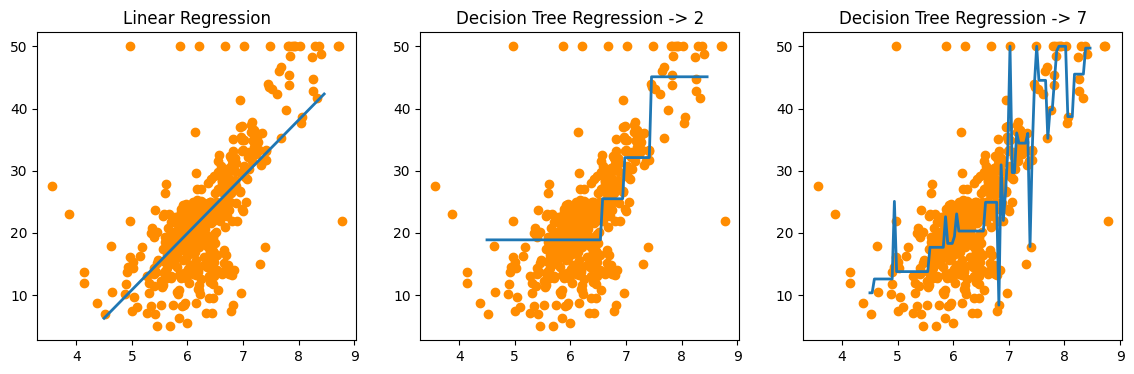

In [59]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
rf2=DecisionTreeRegressor(max_depth=2)
rf7=DecisionTreeRegressor(max_depth=7)

x_test=np.arange(4.5,8.5,0.04).reshape(-1,1)
x_data=df['RM'].values.reshape(-1,1)
y_data=df['Target'].values.reshape(-1,1)

lr.fit(x_data,y_data)
rf2.fit(x_data,y_data)
rf7.fit(x_data,y_data)

pred_lr=lr.predict(x_test)
pred_rf2=rf2.predict(x_test)
pred_rf7=rf7.predict(x_test)

fig,(ax1,ax2,ax3)=plt.subplots(figsize=(14,4),ncols=3)
ax1.set_title('Linear Regression')
ax1.scatter(df.RM,df.Target,c='darkorange')
ax1.plot(x_test,pred_lr,label='linear',linewidth=2)

ax2.set_title('Decision Tree Regression -> 2')
ax2.scatter(df.RM,df.Target,c='darkorange')
ax2.plot(x_test,pred_rf2,label='max_depth:2',linewidth=2)

ax3.set_title('Decision Tree Regression -> 7')
ax3.scatter(df.RM,df.Target,c='darkorange')
ax3.plot(x_test,pred_rf7,label='max_depth:7',linewidth=2)


In [56]:
df

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0
